In [ ]:
from tensorflow.python.client import device_lib
 
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11797303882536471518, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14674281152
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13018591386463369260
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

# load dfset
drive.mount('/drive')   #mount the drive to load 

Mounted at /drive


In [ ]:
PATH_DATA = '.../EURUSD1.csv'

data = pd.read_csv(PATH_DATA, names=['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
data

,Date,Time,Open,High,Low,Close,Volume
0,2004.07.29,08:53,1.20270,1.20300,1.20220,1.20230,10
1,2004.07.29,08:54,1.20270,1.20280,1.20210,1.20220,9
2,2004.07.29,08:55,1.20260,1.20290,1.20230,1.20270,9
3,2004.07.29,08:56,1.20240,1.20260,1.20210,1.20230,9
4,2004.07.29,08:57,1.20220,1.20260,1.20170,1.20230,12
...,...,...,...,...,...,...,...
6001881,2021.01.28,20:30,1.21291,1.21302,1.21289,1.21295,72
6001882,2021.01.28,20:31,1.21297,1.21299,1.21289,1.21292,35
6001883,2021.01.28,20:32,1.21291,1.21291,1.21283,1.21283,22
6001884,2021.01.28,20:33,1.21284,1.21288,1.21269,1.21271,78


In [ ]:
# Merge date and time into one column and convert its datatype into datatime
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data = data.drop(columns=['Date', 'Time'])
data = data[['Datetime', 'Open', 'High', 'Low', 'Close', 'Volume']]
data['Volume'] = data['Volume'].astype('float')
data

,Datetime,Open,High,Low,Close,Volume
0,2004-07-29 08:53:00,1.20270,1.20300,1.20220,1.20230,10.0
1,2004-07-29 08:54:00,1.20270,1.20280,1.20210,1.20220,9.0
2,2004-07-29 08:55:00,1.20260,1.20290,1.20230,1.20270,9.0
3,2004-07-29 08:56:00,1.20240,1.20260,1.20210,1.20230,9.0
4,2004-07-29 08:57:00,1.20220,1.20260,1.20170,1.20230,12.0
...,...,...,...,...,...,...
6001881,2021-01-28 20:30:00,1.21291,1.21302,1.21289,1.21295,72.0
6001882,2021-01-28 20:31:00,1.21297,1.21299,1.21289,1.21292,35.0
6001883,2021-01-28 20:32:00,1.21291,1.21291,1.21283,1.21283,22.0
6001884,2021-01-28 20:33:00,1.21284,1.21288,1.21269,1.21271,78.0


In [ ]:
# Use an subset of data 

START_DATE = '2010-01-01'
END_DATE = '2011-01-01'
data = data.loc[(data['Datetime'] >= START_DATE) & (data['Datetime'] <= END_DATE)]
data

,Datetime,Open,High,Low,Close,Volume
1902994,2010-01-03 23:00:00,1.43259,1.43259,1.43213,1.43222,28.0
1902995,2010-01-03 23:01:00,1.43227,1.43242,1.43223,1.43241,12.0
1902996,2010-01-03 23:02:00,1.43234,1.43244,1.43231,1.43235,22.0
1902997,2010-01-03 23:03:00,1.43236,1.43237,1.43231,1.43231,5.0
1902998,2010-01-03 23:04:00,1.43232,1.43235,1.43225,1.43235,14.0
...,...,...,...,...,...,...
2270113,2010-12-31 21:43:00,1.33813,1.33887,1.33805,1.33805,10.0
2270114,2010-12-31 21:44:00,1.33848,1.33849,1.33843,1.33843,4.0
2270115,2010-12-31 21:45:00,1.33803,1.33863,1.33801,1.33816,11.0
2270116,2010-12-31 21:46:00,1.33795,1.33867,1.33794,1.33833,6.0


In [ ]:
# Split data into train and test
# 80% Training : 20% Test
TRAIN_TEST_RATIO = 0.8
TRAIN_TEST_INDEX = int(data.shape[0] * TRAIN_TEST_RATIO)
TRAIN_TEST_INDEX

train, test = data.iloc[0:TRAIN_TEST_INDEX], data.iloc[TRAIN_TEST_INDEX:]
print('train shape: {}'.format(train.shape))
print('test shape: {}'.format(test.shape))

train shape: (293699, 6)
test shape: (73425, 6)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(train[['Close']])
train['Close'] = scaler.transform(train[['Close']])
test['Close'] = scaler.transform(test[['Close']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
TIME_STEPS = 30

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

X_train, y_train = create_dataset(train[['Close']], train[['Close']], TIME_STEPS)
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))

X_train shape: (293669, 30, 1)
y_train shape: (293669, 1)


In [ ]:
X_test, y_test = create_dataset(test[['Close']], test[['Close']], TIME_STEPS)
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_test shape: (73395, 30, 1)
y_test shape: (73395, 1)


In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, RepeatVector, TimeDistributed

model = Sequential()
model.add(GRU(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(X_train.shape[1]))
model.add(GRU(64, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 64)                12864     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 30, 64)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 30, 64)            24960     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 64)            0         
_________________________________________________________________
time_distributed (TimeDistri (None, 30, 1)             65        
Total params: 37,889
Trainable params: 37,889
Non-trainable params: 0
____________________________________________________

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.1, shuffle=False)

Epoch 1/20
4130/4130 [==============================] - 57s 6ms/step - loss: 0.1066 - val_loss: 0.8579
Epoch 2/20
4130/4130 [==============================] - 23s 6ms/step - loss: 0.1260 - val_loss: 0.7013
Epoch 3/20
4130/4130 [==============================] - 23s 6ms/step - loss: 0.1064 - val_loss: 0.4248
Epoch 4/20
4130/4130 [==============================] - 23s 6ms/step - loss: 0.1004 - val_loss: 0.3483
Epoch 5/20
4130/4130 [==============================] - 23s 6ms/step - loss: 0.0961 - val_loss: 0.3195
Epoch 6/20
4130/4130 [==============================] - 24s 6ms/step - loss: 0.0948 - val_loss: 0.3098
Epoch 7/20
4130/4130 [==============================] - 23s 6ms/step - loss: 0.0931 - val_loss: 0.3196
Epoch 8/20
4130/4130 [==============================] - 23s 6ms/step - loss: 0.0932 - val_loss: 0.3412
Epoch 9/20
4130/4130 [==============================] - 23s 6ms/step - loss: 0.0950 - val_loss: 0.3757
Epoch 10/20
4130/4130 [==============================] - 23s 6ms/step - l

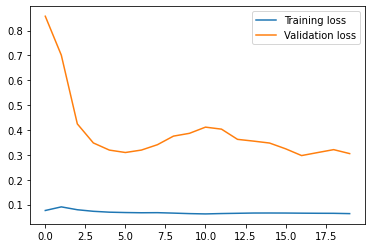

In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend();

In [ ]:
# Save the model
PATH_MODEL_GRU_AE = '.../model_gru_autoencoder'
model.save(PATH_MODEL_GRU_AE)

INFO:tensorflow:Assets written to: /drive/Shareddrives/CSE 573: Team Project/Model/Jinyung/model_gru_autoencoder/assets


INFO:tensorflow:Assets written to: /drive/Shareddrives/CSE 573: Team Project/Model/Jinyung/model_gru_autoencoder/assets


In [ ]:
model.evaluate(X_test, y_test)

2294/2294 [==============================] - 6s 3ms/step - loss: 0.1800


0.17998729646205902

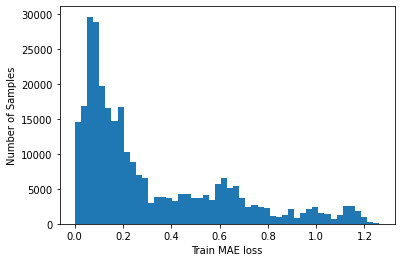

In [ ]:
X_train_pred = model.predict(X_train, verbose=0)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel('Train MAE loss')
plt.ylabel('Number of Samples');

In [ ]:
threshold = np.percentile(train_mae_loss, 90) 
print(f'Reconstruction error threshold: {threshold}')

Reconstruction error threshold: 0.7669713863314833


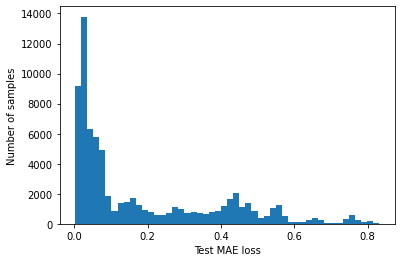

In [ ]:
X_test_pred = model.predict(X_test, verbose=0)
test_mae_loss = np.mean(np.abs(X_test_pred-X_test), axis=1)

plt.hist(test_mae_loss, bins=50)
plt.xlabel('Test MAE loss')
plt.ylabel('Number of samples');